# Milestone 3 -- co-variance of stocks

##### *Table of Contents:*

1. Preprocessing of stock and follow by correlation analysis
2. Dimension reduction
3. Preprocessing of other sources datasets
   - currency
   - news
   - klse
   - forum

## Preprocessing of stock and follow by correlation analysis

##### *Part 1 : Preprocessed data*

In [1]:
# Merge all the dataset together
import pandas as pd

def price_csv():
    df_list = []
    url = 'https://raw.githubusercontent.com/WQD170071/Data-Mining-Project/master/Dataset/Milestone%203/Price_csv/Day_'
    SaveFile_Name = r'Stock_Price.csv'
    
    #Loop through the names of the individual CSV files in the list and append them to the merged file
    for i in range(1,42):
        df = pd.read_csv(url+str(i)+'.csv')
        df_list.append(df)
    
    df = pd.concat(df_list)
    df.to_csv(SaveFile_Name,index=False,sep=',')

def sector_csv():
    df_list = []
    url = 'https://raw.githubusercontent.com/WQD170071/Data-Mining-Project/master/Dataset/Milestone%203/Sector_csv/sector'
    SaveFile_Name = r'Stock_Sector.csv'
    #Loop through the names of the individual CSV files in the list and append them to the merged file
    for i in range(1,17):
        df = pd.read_csv(url+str(i)+'.csv')
        df_list.append(df)
    
    df = pd.concat(df_list)
    df = df.drop_duplicates()
    df.to_csv(SaveFile_Name,index=False,sep=',')

price_csv()
sector_csv()

# read csv files
price = pd.read_csv('https://raw.githubusercontent.com/WQD170071/Data-Mining-Project/master/Dataset/Milestone%203/Stock_Price.csv')
sector = pd.read_csv('https://raw.githubusercontent.com/WQD170071/Data-Mining-Project/master/Dataset/Milestone%203/Stock_Sector.csv')

# merge price and sector
stock = pd.merge(price, sector.drop(['code'],axis=1), on = 'name', how = 'left')
stock.to_csv('All_Stocks.csv',index=False,sep=',')
print(stock)

# just check how many missing value each variable, using 'x' indicate missing
df1 = stock
df1 = df1.replace('-','x')
df1 = df1.fillna('x')
(df1 == 'x').astype(int).sum(axis=0)


                                                    name    code       date  \
0      A50CHIN-C22: CW ETF ISHARES FTSE A50 CHINA IND...   70322  25-Feb-19   
1      A50CHIN-C24: CW ETF ISHARES FTSE A50 CHINA IND...   70324  25-Feb-19   
2      A50CHIN-C26: CW ISHARES FTSE A50 CHINA INDEX E...   70326  25-Feb-19   
3      A50CHIN-C28: CW ISHARES FTSE A50 CHINA INDEX E...   70328  25-Feb-19   
4      A50CHIN-C30: CW ISHARES FTSE A50 CHINA INDEX E...   70330  25-Feb-19   
5      A50CHIN-C32: CW ISHARES FTSE A50 CHINA INDEX E...   70332  25-Feb-19   
6      A50CHIN-C34: CW ISHARES FTSE A50 CHINA INDEX E...   70334  25-Feb-19   
7      A50CHIN-C36: CW ISHARES FTSE A50 CHINA INDEX E...   70336  25-Feb-19   
8      A50CHIN-H21: PW ETF ISHARES FTSE A50 CHINA IND...   70321  25-Feb-19   
9      A50CHIN-H23: PW ETF ISHARES FTSE A50 CHINA IND...   70323  25-Feb-19   
10     A50CHIN-H25: PW ISHARES FTSE A50 CHINA INDEX E...   70325  25-Feb-19   
11     A50CHIN-H27: PW ISHARES FTSE A50 CHINA INDEX 

name               0
code               0
date               0
time               0
open           27377
low            27377
high           27377
price              0
volume             0
buy/volume         0
sell/volume        0
Sector_main     5171
sector          5171
dtype: int64

##### *Part 2 : Calculating percentage of change in price*

In [28]:
# read the merged stock file
data = pd.read_csv('https://raw.githubusercontent.com/WQD170071/Data-Mining-Project/master/Dataset/Milestone%203/All_Stocks.csv')

#format and sort 'date' variable
data['date'] = pd.to_datetime(data.date)
data = data.sort_values(by = 'date')

#group the data by its 'name'
data_byname = data.groupby('name')

nameList = []
for name, group in data_byname:
    nameList.append(group)

#create a column 'change'
#calculate the percentage of change of stock : change = (todayprice-yesterdayprice)/yesterdayprice
for j in nameList:
    #print(j)
    j['change'] = (j['price']-j['price'].shift(1))/j['price'].shift(1)

#save data into csv file
nameList[0].to_csv('pct_chg_all.csv', index=False)
for k in nameList[1:]:
    k.to_csv('pct_chg_all.csv', index=False, header=False, mode='a+')


##### *Part 3 : Filtering data by market and sector*

In [29]:
import os

df = pd.read_csv('https://raw.githubusercontent.com/WQD170071/Data-Mining-Project/master/Dataset/Milestone%203/pct_chg_all.csv')
# create new folder
if os.path.exists('market')==False:
    os.mkdir('market')
#separate dataset into diff_main_sector
#main market
df_main = df.loc[df['Sector_main'] == 'Main Market']
df_main.to_csv('market/all_Main_Market.csv', index = False)

#ace market
df_ace = df.loc[df['Sector_main'] == 'Ace Market']
df_ace.to_csv('market/all_Ace_Market.csv', index = False)

#bond&loan
df_bond_loan = df.loc[df['Sector_main'] == 'Bond & Loan']
df_bond_loan.to_csv('market/all_Bond&Loan.csv', index = False)

#etf
df_etf = df.loc[df['Sector_main'] == 'ETF']
df_etf.to_csv('market/all_ETF.csv', index = False)

#warrants
df_warrants = df.loc[df['Sector_main'] == 'Warrants']
df_warrants.to_csv('market/all_Warrants.csv', index = False)

##### *Part 4 : Creating pivot table to see the relationship of each stocks within the same sector and the same market*

In [30]:
market = os.listdir('market')
# create new folder
if os.path.exists('market/pivot_table')==False:
    os.mkdir('market/pivot_table')
for m in market:
    data1 = pd.read_csv('market/' + m)
    #get the first element in column sector_main
    filename1 = data1['Sector_main'].iloc[0]
    #group stock together by sector
    sector = data1.groupby('sector')
    sectorList = []
    #create a list containing dataframe for each sector
    for name, group in sector:
        sectorList.append(group)
        
        for n in sectorList:
            dataframe = pd.DataFrame(n)
            #get the first element in column sector
            filename2 = dataframe['sector'].iloc[0]
            #give name to a new csv filr
            filename = 'pivot_' + filename1 + '_' + filename2 + '.csv'
            #build a pivot table for each sector
            df_new = pd.pivot_table(dataframe, index = 'date', columns = 'name', values = 'change')
            #export to csv file
            df_new.to_csv('market/pivot_table/' + filename)
            

##### *Part 5 : Correlation analysis*

In [31]:
data2 = os.listdir('market/pivot_table')

corrList = []
nameList1= []

for df in data2:
    #read csv
    data3 = pd.read_csv('market/pivot_table/' + df)
    #shorten the file name for naming excel tabs
    df = df.replace('Warrants', 'W')
    df = df.replace('Ace Market', 'AM')
    df = df.replace('Main Market', 'MM')
    df = df.replace('Bond & Loan', 'BL')
    df = df.replace('Industrial Products & Services', 'IPS')
    df = df.replace('Consumer Products & Services', 'CPS')
    df = df.replace('Telecommunications & Media', 'TM')
    df = df.replace('Transportation & Logistics', 'TL')
    df = df.replace('Exchange Traded Fund', 'ETF')
    df = df.replace('Real Estate Investment Trusts', 'REIT')
    df = df.replace('Special Purpose Acquisition Company', 'SPAC')
    df = df.replace('Financial Services', 'FS')
    df = df.replace('Bond Islamic', 'BI')
    df = df.replace('Closed End Fund', 'CEF')
    a = os.path.splitext(df)[0]
    name = a[6:]
    nameList1.append(name)
    #correlation
    col_name = list(data3.columns.values)
    col_name.remove('date')
    correlation = data3[col_name].corr()
    correlation = round(correlation, 5)
    #print(correlation)
    corrList.append(correlation)
    
#function to produce excel file containing all correlation results
def dfs_tabs(df_list, sheet_list, file_name):
    writer = pd.ExcelWriter(file_name, engine = 'xlsxwriter')   
    for dataframe, sheet in zip(df_list, sheet_list):
        dataframe.to_excel(writer, sheet_name=sheet, startrow=0 , startcol=0)   
    writer.save()

#run function
dfs_tabs(corrList, nameList1, 'correlation_results.xlsx')

In [33]:
df = pd.read_excel('correlation_results.xlsx')
df

,EDEN INC. BERHAD - WARRANTS B 2018/2021,EDEN INC. BHD,GAS MALAYSIA BERHAD,KUMPULAN PERANGSANG SELANGOR,MALAKOFF CORPORATION BERHAD,MEGA FIRST CORPORATION BERHAD - WARRANTS A 2016/2020,MEGA FIRST CORPORATION BHD,PBA HOLDINGS BHD,PETRONAS GAS BHD,RANHILL HOLDINGS BERHAD,SALCON BERHAD - WARRANTS B 2018/2025,SALCON BHD,TALIWORKS CORPORATION BHD,TENAGA NASIONAL BHD,YTL CORPORATION BHD,YTL POWER INTERNATIONAL BHD
EDEN INC. BERHAD - WARRANTS B 2018/2021,1.00000,0.59704,-0.14890,-0.01933,0.07639,0.15506,0.18851,0.21110,0.23461,0.11038,0.11922,-0.00876,-0.16417,0.28334,0.19832,0.31447
EDEN INC. BHD,0.59704,1.00000,-0.02662,0.05321,0.11434,-0.05876,0.22365,-0.09013,-0.09205,0.19411,0.22678,0.04574,-0.04352,0.23374,0.12482,0.14331
GAS MALAYSIA BERHAD,-0.14890,-0.02662,1.00000,0.02125,0.06078,-0.07516,0.07170,0.10311,0.20126,0.22206,-0.21352,-0.05234,0.33374,0.42235,0.31105,0.35244
KUMPULAN PERANGSANG SELANGOR,-0.01933,0.05321,0.02125,1.00000,0.15788,-0.14245,-0.00072,-0.06248,0.05974,-0.15094,0.09732,0.07423,0.23334,-0.02953,0.07945,0.05139
MALAKOFF CORPORATION BERHAD,0.07639,0.11434,0.06078,0.15788,1.00000,-0.00275,0.18992,-0.24947,0.04014,0.13169,-0.08108,0.05565,0.06319,0.18488,0.09028,0.24122
MEGA FIRST CORPORATION BERHAD - WARRANTS A 2016/2020,0.15506,-0.05876,-0.07516,-0.14245,-0.00275,1.00000,0.47435,0.16624,0.01868,0.05453,0.29226,0.33439,0.01323,0.04347,0.17390,-0.01088
MEGA FIRST CORPORATION BHD,0.18851,0.22365,0.07170,-0.00072,0.18992,0.47435,1.00000,-0.14575,-0.25246,0.08565,0.32489,0.06531,-0.01710,0.04735,0.09381,0.21074
PBA HOLDINGS BHD,0.21110,-0.09013,0.10311,-0.06248,-0.24947,0.16624,-0.14575,1.00000,0.43053,0.12799,-0.07623,-0.03941,0.02519,0.37348,0.18603,0.27018
PETRONAS GAS BHD,0.23461,-0.09205,0.20126,0.05974,0.04014,0.01868,-0.25246,0.43053,1.00000,0.17514,-0.35482,-0.21576,0.16634,0.25624,0.29459,0.34969
RANHILL HOLDINGS BERHAD,0.11038,0.19411,0.22206,-0.15094,0.13169,0.05453,0.08565,0.12799,0.17514,1.00000,0.17626,0.08917,0.33798,0.18840,0.15210,0.24885


## Dimension reduction

##### *Part 1 : Plot one stock as an example*

A-RANK BHD - Daily closing price (7214):


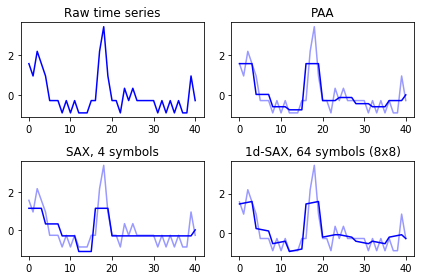

In [35]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, OneD_SymbolicAggregateApproximation
from tslearn.utils import to_time_series

price = pd.read_csv('https://raw.githubusercontent.com/WQD170071/Data-Mining-Project/master/Dataset/Milestone%203/Stock_Price.csv')
sector = pd.read_csv('https://raw.githubusercontent.com/WQD170071/Data-Mining-Project/master/Dataset/Milestone%203/Stock_Sector.csv')

df = pd.merge(price, sector.drop(['code'],axis=1), on = 'name', how = 'left')
#format and sort 'date' variable
df['date'] = pd.to_datetime(df.date)
data = df.sort_values(by = 'date')

#group the data by its 'name'
data_byname = data.groupby('name')

nameList = []
for name, group in data_byname:
    nameList.append(group)
    
# Choose one of the stock to plot the graph 
i = 2

dataset = [list(nameList[i].price)]
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset = scaler.fit_transform(dataset)

# PAA transform (and inverse transform) of the data
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(dataset))

# SAX transform
n_sax_symbols = 4
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))

# 1d-SAX transform
n_sax_symbols_avg = 8
n_sax_symbols_slope = 8
one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols_avg,
                                                alphabet_size_slope=n_sax_symbols_slope)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(one_d_sax.fit_transform(dataset))

name = nameList[i].name.values[0]
code = nameList[i].code.values[0]
print(name+" - Daily closing price ("+code+"):")

plt.figure()
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(dataset[0].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3)  # Then SAX
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols (%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                                          n_sax_symbols_avg,
                                          n_sax_symbols_slope))

plt.tight_layout()
plt.show()

##### *Part 2 : Save all the plot data of the stock into one single .csv file*

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, OneD_SymbolicAggregateApproximation
from tslearn.utils import to_time_series


price = pd.read_csv('https://raw.githubusercontent.com/WQD170071/Data-Mining-Project/master/Dataset/Milestone%203/Stock_Price.csv')
sector = pd.read_csv('https://raw.githubusercontent.com/WQD170071/Data-Mining-Project/master/Dataset/Milestone%203/Stock_Sector.csv')

df = pd.merge(price, sector.drop(['code'],axis=1), on = 'name', how = 'left')
#format and sort 'date' variable
df['date'] = pd.to_datetime(df.date)
data = df.sort_values(by = 'date')

#group the data by its 'name'
data_byname = data.groupby('name')

nameList = []
for name, group in data_byname:
    nameList.append(group)

df_list = []

for i in range(len(nameList)):
    try:
        df = nameList[i]

        dataset = [list(nameList[i].price)]
        scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
        dataset = scaler.fit_transform(dataset)
        df['raw'] = dataset[0]

        # PAA transform (and inverse transform) of the data
        n_paa_segments = 10
        paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
        paa_dataset_inv = paa.inverse_transform(paa.fit_transform(dataset))
        df['paa'] = paa_dataset_inv[0]

        # SAX transform
        n_sax_symbols = 4
        sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
        sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))
        df['sax'] = sax_dataset_inv[0]

        # 1d-SAX transform
        n_sax_symbols_avg = 8
        n_sax_symbols_slope = 8
        one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols_avg,
                                                        alphabet_size_slope=n_sax_symbols_slope)
        one_d_sax_dataset_inv = one_d_sax.inverse_transform(one_d_sax.fit_transform(dataset))
        df['one_dsax'] = one_d_sax_dataset_inv[0]

        df_list.append(df[['name','code','date','price','raw','paa','sax','one_dsax','Sector_main','sector']])
        
    except ZeroDivisionError:
        pass

In [36]:
#df_list
df = pd.concat(df_list)
df.to_csv('Stock_paa_sax.csv',index=False,sep=',')
df

,name,code,date,time,open,low,high,price,volume,buy/volume,sell/volume
0,A50CHIN-C22: CW ETF ISHARES FTSE A50 CHINA IND...,70322,25-Feb-19,6:15 PM,0.12,0.12,0.235,0.225,"65,332",0.195 / 200,0.240 / 150
1,A50CHIN-C24: CW ETF ISHARES FTSE A50 CHINA IND...,70324,25-Feb-19,6:15 PM,0.645,0.645,0.8,0.800,400,0.000 / 0,0.000 / 0
2,A50CHIN-C26: CW ISHARES FTSE A50 CHINA INDEX E...,70326,25-Feb-19,6:15 PM,0.41,0.41,0.495,0.495,"86,944",0.000 / 0,0.000 / 0
3,A50CHIN-C28: CW ISHARES FTSE A50 CHINA INDEX E...,70328,25-Feb-19,6:15 PM,0.265,0.265,0.275,0.270,"25,304",0.000 / 0,0.000 / 0
4,A50CHIN-C30: CW ISHARES FTSE A50 CHINA INDEX E...,70330,25-Feb-19,6:15 PM,0.255,0.255,0.36,0.350,"64,282",0.220 / 200,0.000 / 0
5,A50CHIN-C32: CW ISHARES FTSE A50 CHINA INDEX E...,70332,25-Feb-19,6:15 PM,0.59,0.59,0.75,0.750,"9,631",0.000 / 0,0.000 / 0
6,A50CHIN-C34: CW ISHARES FTSE A50 CHINA INDEX E...,70334,25-Feb-19,6:15 PM,0.855,0.855,0.86,0.860,150,0.000 / 0,0.000 / 0
7,A50CHIN-C36: CW ISHARES FTSE A50 CHINA INDEX E...,70336,25-Feb-19,6:15 PM,0.475,0.46,0.575,0.570,"124,492",0.490 / 100,0.000 / 0
8,A50CHIN-H21: PW ETF ISHARES FTSE A50 CHINA IND...,70321,25-Feb-19,6:15 PM,-,-,-,0.050,0,0.000 / 0,0.000 / 0
9,A50CHIN-H23: PW ETF ISHARES FTSE A50 CHINA IND...,70323,25-Feb-19,6:15 PM,0.015,0.015,0.015,0.015,670,0.000 / 0,0.010 / 450


## Preprocessing of other sources datasets

- ***currency***

In [2]:
import pandas as pd
import os 

def currency_csv():
    df_list = []
    url = 'https://raw.githubusercontent.com/WQD170071/Data-Mining-Project/master/Dataset/Milestone%203/Currency_csv/Day_'
    SaveFile_Name = r'all_currency.csv'
    
    #Loop through the names of the individual CSV files in the list and append them to the merged file
    for i in range(1,27):
        df = pd.read_csv(url+str(i)+'.csv')
        df_list.append(df)
    
    df = pd.concat(df_list)
    df.to_csv(SaveFile_Name,index=False,sep=',')

currency_csv()


#read combined csv file    
all = pd.read_csv('https://raw.githubusercontent.com/WQD170071/Data-Mining-Project/master/Dataset/Milestone%203/all_currency.csv', sep = ',')

#separate date_day into two columns, namely date and day
all[['date', 'day']] = all.date_day.str.split("(", expand = True)
all['day'] = all['day'].map(lambda x: x.lstrip('+-').rstrip(')'))

#remove column date_day from dataset
all = all.drop("date_day", axis = 1)
all = all.drop(columns = 'Unnamed: 0')

#shift column
columnsName = ['currency_unit', 'date', 'day', 'buy_rate', 'middle_rate', 'sell_rate']
all = all.reindex(columns = columnsName)

#write the processed dataset into a new dataset
all.to_csv('currency_preprocessed.csv', index = False)
all

,currency_unit,date,day,buy_rate,middle_rate,sell_rate
0,USD,25 Feb 2019,Monday,4.0680,4.0705,4.0730
1,USD,26 Feb 2019,Tuesday,4.0700,4.0720,4.0740
2,USD,27 Feb 2019,Wednesday,4.0640,4.0655,4.0670
3,USD,28 Feb 2019,Thursday,4.0690,4.0705,4.0720
4,USD,1 Mar 2019,Friday,4.0710,4.0730,4.0750
5,USD,4 Mar 2019,Monday,4.0740,4.0765,4.0790
6,USD,5 Mar 2019,Tuesday,4.0740,4.0760,4.0780
7,USD,6 Mar 2019,Wednesday,4.0910,4.0930,4.0950
8,USD,7 Mar 2019,Thursday,4.0860,4.0885,4.0910
9,USD,8 Mar 2019,Friday,4.0890,4.0910,4.0930


- ***news***

In [38]:
import pandas as pd
import re


#load data
a = pd.read_csv(r"https://raw.githubusercontent.com/WQD170071/Data-Mining-Project/master/Dataset/Milestone%203/news_20190318.csv")
b = pd.read_csv(r"https://raw.githubusercontent.com/WQD170071/Data-Mining-Project/master/Dataset/Milestone%203/news_20190327.csv")

#merge data by columns
merge_news = a.append(b)

#remove duplicates of news
merge_news['extract_code'] = merge_news['code'].str[-4:]
news = merge_news.sort_values('extract_code',ascending=True).drop_duplicates(['news'],keep='first')

#extract date
news['extracted_date']=news.date.str.extract(r'(\d{2}\s[A-Z][a-z]{2},\s\d{4})')

#remove news that before 25 Feb 2019
news['extracted_date']=pd.to_datetime(news['extracted_date'])
res = news[~(news['extracted_date']<'25 Feb, 2019')]

res.to_csv(r"News_processed.csv")
res

,code,date,news,extract_code,extracted_date
10437,https://www.klsescreener.com/v2/news/stock/0002,"TheEdge14 Mar, 2019 00:37am - 1 week ago",HDC signs MoU with Korean agency to enhance ha...,0002,2019-03-14
10438,https://www.klsescreener.com/v2/news/stock/0002,"TheEdge13 Mar, 2019 01:52am - 2 weeks ago",Malaysia's first and biggest-Korean themed ret...,0002,2019-03-13
9268,https://www.klsescreener.com/v2/news/stock/0005,"TheEdge15 Mar, 2019 13:55pm - 1 week ago","OCK, Ucrest, Orion, Bahvest, Tri-Mode, IWCity,...",0005,2019-03-15
13866,https://www.klsescreener.com/v2/news/stock/0007,"TheEdge18 Mar, 2019 12:53pm - 1 week ago","KLCI pares gains, up 0.38% as select blue chip...",0007,2019-03-18
13860,https://www.klsescreener.com/v2/news/stock/0007,"Sinchew25 Mar, 2019 09:45am - 2 days ago",延续上周走势‧马股早盘低迷,0007,2019-03-25
13861,https://www.klsescreener.com/v2/news/stock/0007,"TheEdge19 Mar, 2019 13:46pm - 1 week ago",投资者情绪转淡 拖累马股回落,0007,2019-03-19
13862,https://www.klsescreener.com/v2/news/stock/0007,"TheEdge19 Mar, 2019 13:00pm - 1 week ago",KLCI retreats as sentiment turns tepid,0007,2019-03-19
13863,https://www.klsescreener.com/v2/news/stock/0007,"TheEdge19 Mar, 2019 10:43am - 1 week ago",马股小幅上升 乏力突破1700点,0007,2019-03-19
13864,https://www.klsescreener.com/v2/news/stock/0007,"TheEdge19 Mar, 2019 10:23am - 1 week ago","KLCI edges up, struggles to breach 1,700 level",0007,2019-03-19
13865,https://www.klsescreener.com/v2/news/stock/0007,"TheEdge18 Mar, 2019 13:33pm - 1 week ago",蓝筹股走高 提振马股小涨0.38%,0007,2019-03-18


- ***klse***

In [5]:
import pandas as pd
import os
import re
import numpy as np

#append all files together
appended_data = []

url = 'https://raw.githubusercontent.com/WQD170071/Data-Mining-Project/master/Dataset/Milestone%203/Klse_csv/stock_klse_'

#Loop through the names of the individual CSV files in the list and append them to the merged file
for i in range(1,6):
    df = pd.read_csv(url+str(i)+'.csv')
    appended_data.append(df)

appended_data = pd.concat(appended_data, axis = 0)

#select unique data from dataset
appended_data = appended_data.drop_duplicates()

#to extract code from 'name' variable
codeList = []
for each in appended_data['name']:
    code1 = re.findall(r"\(([0-9]+)\)", each)
    codeList.append(code1)

code = pd.DataFrame({'code': codeList})
code.code = code.code.apply(lambda y: np.nan if len(y)==0 else y)

codeList1 = []
for j in codeList:
    if j == []:
        j = ['nan']
    else:
        j = j
    codeList1.append(j)
flat_list = [item for sublist in codeList1 for item in sublist]

#add variable 'code' to dataframe
appended_data['code'] = flat_list
#remove variable 'name' from dataframe
appended_data = appended_data.drop('name', axis = 1)

#separate category into variable sector_main and sector
new = appended_data['category'].str.split('-', n = 1, expand = True)
appended_data['Sector_main'] = new[1]
appended_data['sector'] = new[0]
#remove variable 'category' from dataframe
appended_data = appended_data.drop('category', axis = 1)

#rearrange columns
#print(appended_data.columns.values)
cols =['full name', 'code', 'Sector_main', 'sector', '52w', 'ROE', 'P/E', 'EPS', 'DPS', 'DY', 'PTBV', 'RPS', 'PSR', 'Market_Cap', 'RSI', 'Stochastic']
appended_data = appended_data[cols]

#write to csv
appended_data.to_csv('klse_clean.csv', index = False)
appended_data

,full name,code,Sector_main,sector,52w,ROE,P/E,EPS,DPS,DY,PTBV,RPS,PSR,Market_Cap,RSI,Stochastic
0,SUMATEC RESOURCES BERHAD,1201,Main Market,Energy,0.005 - 0.075,-0.59,-16,-0.06,0.00,0,0.10,0.07,14.0,42.5M,Neutral 52.7,Overbought 100.0
1,NaN,03021,Leap Market,Consumer Products & Services,0.165 - 0.175,0.00,0,0.00,0.00,0,16.50,0.00,NaN,0.9M,Oversold 0.0,Oversold 0.0
2,DESTINI BERHAD,7212,Main Market,Industrial Products & Services,0.120 - 0.560,0.36,144,0.16,0.00,0,0.51,34.72,1.0,259.9M,Neutral 49.2,Neutral 40.0
3,MUHIBBAH ENGINEERING (M) BHD,5703,Main Market,Construction,2.510 - 3.200,12.85,10,29.94,0.00,0,1.27,324.63,1.0,"1,426.6M",Neutral 51.7,Neutral 70.8
4,UOA DEVELOPMENT BHD,5200,Main Market,Property,1.840 - 2.710,8.09,11,20.54,15.00,0.0691,0.85,68.50,3.0,"4,003.4M",Neutral 35.1,Oversold 0.0
5,T7 GLOBAL BERHAD,7228,Main Market,Energy,0.300 - 0.610,5.38,30,1.83,0.00,0,1.59,50.17,1.0,226.5M,Overbought 75.4,Neutral 71.9
6,PPB GROUP BERHAD,4065,Main Market,Consumer Products & Services,16.400 - 21.040,5.11,24,75.57,28.00,0.0151,1.25,318.31,6.0,"26,318.1M",Neutral 58.5,Neutral 37.5
7,MALAYSIA BUILDING SOCIETY BERHAD,1171,Main Market,Financial Services,0.890 - 1.250,8.04,10,10.05,5.00,0.0503,0.80,49.24,2.0,"6,357.2M",Neutral 45.6,Oversold 15.0
8,SANICHI TECHNOLOGY BERHAD,0133,Ace Market,Industrial Products & Services,0.050 - 0.180,-22.91,-3,-1.83,0.00,0,0.69,2.86,2.0,61.0M,Neutral 41.4,Neutral 33.3
9,KUMPULAN POWERNET BERHAD,7130,Main Market,Consumer Products & Services,0.330 - 0.730,-18.20,-7,-5.46,0.00,0,1.30,6.60,6.0,29.7M,Neutral 44.0,Neutral 30.8


- ***forum***

In [40]:
import requests
from lxml import etree
from lxml import html
import re
import time

header={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36',
        'Referer':'https://googleads.g.doubleclick.net/pagead/ads?client=ca-pub-2305666475781689&output=html&h=90&slotname=9390552809&adk=3116781417&adf=1662620477&w=970&lmt=1552753083&guci=2.2.0.0.2.2.0.0&format=970x90&url=http%3A%2F%2Fwww.investalks.com%2Fforum%2Fforum.php%3Fmod%3Dforumdisplay%26fid%3D7%26filter%3Dtypeid%26typeid%3D17&flash=0&wgl=1&dt=1552753083912&bpp=42&bdt=108&fdt=46&idt=22&shv=r20190313&cbv=r20190131&saldr=aa&abxe=1&correlator=6683659723222&frm=20&pv=2&ga_vid=691979923.1552569252&ga_sid=1552752744&ga_hid=1232295072&ga_fc=1&iag=0&icsg=12206&dssz=10&mdo=0&mso=0&u_tz=480&u_his=3&u_java=0&u_h=864&u_w=1536&u_ah=824&u_aw=1536&u_cd=24&u_nplug=3&u_nmime=4&adx=34&ady=100&biw=1026&bih=350&scr_x=0&scr_y=0&eid=21060853&oid=3&rx=0&eae=0&fc=656&brdim=426%2C33%2C426%2C33%2C1536%2C0%2C1057%2C735%2C1042%2C350&vis=1&rsz=%7C%7CeE%7C&abl=CS&ppjl=f&pfx=0&fu=16&bc=7&ifi=1&uci=1.afatrway4czq&fsb=1&xpc=kkAgITwzNl&p=http%3A//www.investalks.com&dtd=90'}

num_list = []
hot_list = []
title_list = []
time1_list = []
time2_list = []
link_list = []
stock_list = []
date1_list = []
date2_list = []

def get_page():
    url = 'http://www.investalks.com/forum/forum.php?mod=forumdisplay&fid=7&typeid=17&filter=typeid&typeid=17&page=1'
    r = requests.get(url, headers = header)
    time.sleep(2)
    html = etree.HTML(r.text)
    page = html.xpath('//div[@class="pg"]/a[@class="last"]/text()')[0].split(' ')[-1]
    return int(page)

def get_info(pages):
    for i in range(1,pages+1):
        html = 'http://www.investalks.com/forum/forum.php?mod=forumdisplay&fid=7&typeid=17&filter=typeid&typeid=17&page=' + str(i)
        html_i = requests.get(html, headers = header)
        time.sleep(2)
        selector =etree.HTML(html_i.text)
        content=selector.xpath('//table[@id="threadlisttableid"]/tbody')[2:]
        for tr in content:
            num_list.append(tr.xpath('.//td//a[@class="xi2"]//text()')[0])
            hot_list.append(tr.xpath('.//td[@class="num"]//em//text()')[0])
            title_list.append(tr.xpath('.//th//a[@class="s xst"]//text()')[0])
            stock = re.findall(r'\d+',tr.xpath('.//th//a[@class="s xst"]//text()')[0])
            stock = " ".join(stock)
            stock_list.append(stock[0:4])
            time1_list.append(tr.xpath('.//td//em//span//text()')[0][-5:])
            date1_list.append(tr.xpath('.//td//em//span//text()')[0][:-6])
            time2_list.append(tr.xpath('.//td//em//a//text()')[0][-5:])
            date2_list.append(tr.xpath('.//td//em//a//text()')[0][:-6])
            #date_latest_list.append(tr.xpath('.//td//em//'))
            link_list.append('http://www.investalks.com/forum/'+tr.xpath('.//th//a[@class="s xst"]/@href')[0])
    return

total_page = get_page()
get_info(total_page)

import pandas as pd
dataframe = pd.DataFrame({'Stock Code':stock_list,'Titles':title_list,'Hot':hot_list,'Replies':num_list,'Start_Date':date1_list,'Start_Time':time1_list,'Latest_Date':date2_list,'Latest_Time':time2_list,'Link':link_list})
sector = pd.read_csv('20_days_sector.csv')
sector = sector.rename(columns={'code':'Stock Code'})
df = pd.merge(sector.drop(['Sector_main','sector'],axis=1), dataframe, on = 'Stock Code', how = 'right')
df.to_csv("Comments_processed.csv",index=False,sep=',')
df

,name,Stock Code,Titles,Hot,Replies,Start_Date,Start_Time,Latest_Date,Latest_Time,Link
0,ADVENTA BHD,7191,7191 Adventa 稳大,39362,281,2010-3-18,20:51,2018-9-7,22:49,http://www.investalks.com/forum/forum.php?mod=...
1,APEX HEALTHCARE BHD,7090,7090 AHEALTH 爱柏士保健,43127,162,2010-3-14,00:43,2019-5-7,12:10,http://www.investalks.com/forum/forum.php?mod=...
2,DUOPHARMA BIOTECH BERHAD,7148,7148 CCMDBIO 马化学药业,24169,151,2011-8-24,15:40,2019-5-27,20:34,http://www.investalks.com/forum/forum.php?mod=...
3,HARTALEGA HOLDINGS BHD,5168,5168 Hartalega 贺特佳,363261,2683,2009-6-11,17:40,2019-5-30,18:50,http://www.investalks.com/forum/forum.php?mod=...
4,IHH HEALTHCARE BERHAD,5225,5225 IHH 綜合保健控股,124784,1208,2011-12-7,09:43,2019-4-11,13:48,http://www.investalks.com/forum/forum.php?mod=...
5,KOSSAN RUBBER INDUSTRIES BHD,7153,7153 KOSSAN 高产尼品,82449,872,2011-3-1,00:04,2019-2-21,16:00,http://www.investalks.com/forum/forum.php?mod=...
6,KOTRA INDUSTRIES BHD,0002,0002 KOTRA 康大工业,5517,50,2012-12-16,02:46,2017-10-27,08:41,http://www.investalks.com/forum/forum.php?mod=...
7,KPJ HEALTHCARE BHD,5878,5878 KPJ 柔佛醫藥保健,136817,1074,2010-1-23,14:05,2019-6-1,13:54,http://www.investalks.com/forum/forum.php?mod=...
8,PHARMANIAGA BHD,7081,7081 PHARMA 發馬,40349,440,2011-5-31,15:54,2019-5-22,06:53,http://www.investalks.com/forum/forum.php?mod=...
9,SUPERMAX CORPORATION BHD,7106,7106 SUPERMAX 速伯瑪,456863,4302,2009-8-27,18:18,2019-5-22,20:59,http://www.investalks.com/forum/forum.php?mod=...
